<p id="toc"></p>

<h1 style="font-family: Times New Roman; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 8vw; font-family: Times New Roman; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#0">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Times New Roman; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#1">1&nbsp;&nbsp;&nbsp;&nbsp;DATASET</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Times New Roman; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2">2&nbsp;&nbsp;&nbsp;&nbsp;DATA EXPLORATION AND VISUALIZATION</a></h3>

<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2.1">2.1&nbsp;&nbsp;&nbsp;&nbsp;Basic Exploration</a></h3>

<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2.2">2.2&nbsp;&nbsp;&nbsp;&nbsp;Changing Datatype and index</a></h3>


<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2.3">2.3&nbsp;&nbsp;&nbsp;&nbsp;Time Series Visualization</a></h3>

<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2.4">2.4&nbsp;&nbsp;&nbsp;&nbsp;Differencing Dataset</a></h3>

<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2.5">2.5&nbsp;&nbsp;&nbsp;&nbsp;Finding correct order and type of differencing</a></h3>

<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2.6">2.6&nbsp;&nbsp;&nbsp;&nbsp;ACF and PACF plots</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Times New Roman; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#3">3&nbsp;&nbsp;&nbsp;&nbsp;MODEL BUILDING</a></h3>

<h3 style="text-indent: 15vw; font-family: Times New Roman; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_imports">3.1&nbsp;&nbsp;&nbsp;&nbsp;Model Imports</a></h3>

---

# <span><center style = "display: fill; border-radius: 40px; background-color:  #ecf0f1 ; font-family: Times New Roman; font-size:40px; color : black; letter-spacing: 3px; font-weight: bold; padding: 10px" id = "0" >0. &nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></center></span>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import random

from IPython.display import display

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, seasonal_plot
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.formula.api import ols

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LinearRegression

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm


from colorama import Fore
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK


import warnings
warnings.filterwarnings('ignore')

In [2]:
class config:
    random_seed = 15

def set_seed(seed = config.random_seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print("--> SEEDING DONE")
    
set_seed(config.random_seed)

--> SEEDING DONE


# <span><center style = "display: fill; border-radius: 40px; background-color:  #ecf0f1 ; font-family: Times New Roman; font-size:40px; color : black; letter-spacing: 3px; font-weight: bold; padding: 10px" id = "1" >1. &nbsp;DATASET&nbsp;&nbsp;&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></center></span>

In [3]:
airline = pd.read_excel('Airlines+Data.xlsx')
energy = pd.read_csv('energy_dataset.csv')
weather = pd.read_csv('weather_features.csv')

# <span><center style = "display: fill; border-radius: 40px; background-color:  #ecf0f1 ; font-family: Times New Roman; font-size:40px; color : black; letter-spacing: 3px; font-weight: bold; padding: 10px" id = "2" >2. &nbsp;DATA EXPLORATION & VISUALIZATION&nbsp;&nbsp;&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></center></span>

## <span><center style="text-indent: 2vw;color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.1'><b>2.1 | Basic Exploration&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>

In [4]:
print(f'The shape of {y_}Airline {bl_} is {y_}{airline.shape}')
print(f'{bl_}The shape of {y_}Energy {bl_} is {y_}{energy.shape}')
print(f'{bl_}The shape of {y_}Weather {bl_} is {y_}{weather.shape}')

The shape of Airline  is (96, 2)
The shape of Energy  is (35064, 29)
The shape of Weather  is (178396, 17)


In [5]:
print(f'{b_} First 5 Rows of Airline dataset')
display(airline.head())

print(f'{b_} Last 5 Rows of Airline dataset')
display(airline.tail())


 First 5 Rows of Airline dataset


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


 Last 5 Rows of Airline dataset


,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [6]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<div style="margin: 2em; line-height: 1.7em; font-family: Times New Roman;">
    <b style="font-size: 24px;">✅ &nbsp; Observation:</b><br><br>- Dataset is completely clean and clear.<br>
    - So Let's plot the line chart
</div>

## <span><center style="text-indent: 2vw;color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.2'><b>2.2 | Changing datatype and index&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>

In [8]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
airline.set_index('Month', drop = False, inplace = True)
airline.rename(columns={'Month':'date'}, inplace= True)
airline.head()

,date,Passengers
Month,,
1995-01-01,1995-01-01,112
1995-02-01,1995-02-01,118
1995-03-01,1995-03-01,132
1995-04-01,1995-04-01,129
1995-05-01,1995-05-01,121


## <span><center style="text-indent: 2vw;color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.3'><b>2.3 | Time Series Visualization&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>

In [10]:
px.line(data_frame=airline ,  y = airline.Passengers)

<div style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 20px;">
    <b style="font-size: 25px;">✅ &nbsp; Observation:</b><br><br>- So There is Yearly Seasonality in dataset and also have upward trend<br>
    - Now we are not going to waste more time on Exploration and Visualization <br>
    - So let's jump toward main part that is Building ARIMA model and OLS model <br>
    - But before that we need to find out values of p, d, q variables 
</div>

## <span><center style="text-indent: 2vw; color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.4'><b>2.4 | Differencing dataset&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>

### <span style="margin: 1em; line-height: 1.7em; font-family: Times New Roman; font-size: 26px;"><b>Non-Seasonal Differencing</b></span>

In [11]:
airline['first_diff'] = airline['Passengers'].diff(1)
airline['second_diff'] = airline['Passengers'].diff(1).diff(1)
airline['third_diff'] = airline['Passengers'].diff(1).diff(1).diff(1)

In [12]:
airline.head(8)

,date,Passengers,first_diff,second_diff,third_diff
Month,,,,,
1995-01-01,1995-01-01,112,NaN,NaN,NaN
1995-02-01,1995-02-01,118,6.0,NaN,NaN
1995-03-01,1995-03-01,132,14.0,8.0,NaN
1995-04-01,1995-04-01,129,-3.0,-17.0,-25.0
1995-05-01,1995-05-01,121,-8.0,-5.0,12.0
1995-06-01,1995-06-01,135,14.0,22.0,27.0
1995-07-01,1995-07-01,148,13.0,-1.0,-23.0
1995-08-01,1995-08-01,148,0.0,-13.0,-12.0


### <span style="margin: 1em; line-height: 1.7em; font-family: Times New Roman; font-size: 26px; color: navy"><b> Seasonal Differencing</b></span>

In [13]:
airline['seasonal_first_diff']=airline['Passengers'].diff(12)

### <span style="margin: 1em; line-height: 1.7em; font-family: Times New Roman; font-size: 26px;"><b> Seasonal + Non-Seasonal Differencing</b></span>

In [14]:
airline['seasonal_non_seasonal']=airline.first_diff.diff(12)

In [15]:
airline.head(18)

,date,Passengers,first_diff,second_diff,third_diff,seasonal_first_diff,seasonal_non_seasonal
Month,,,,,,,
1995-01-01,1995-01-01,112,NaN,NaN,NaN,NaN,NaN
1995-02-01,1995-02-01,118,6.0,NaN,NaN,NaN,NaN
1995-03-01,1995-03-01,132,14.0,8.0,NaN,NaN,NaN
1995-04-01,1995-04-01,129,-3.0,-17.0,-25.0,NaN,NaN
1995-05-01,1995-05-01,121,-8.0,-5.0,12.0,NaN,NaN
1995-06-01,1995-06-01,135,14.0,22.0,27.0,NaN,NaN
1995-07-01,1995-07-01,148,13.0,-1.0,-23.0,NaN,NaN
1995-08-01,1995-08-01,148,0.0,-13.0,-12.0,NaN,NaN
1995-09-01,1995-09-01,136,-12.0,-12.0,1.0,NaN,NaN


Text(0.5, 1.0, 'Passengers')

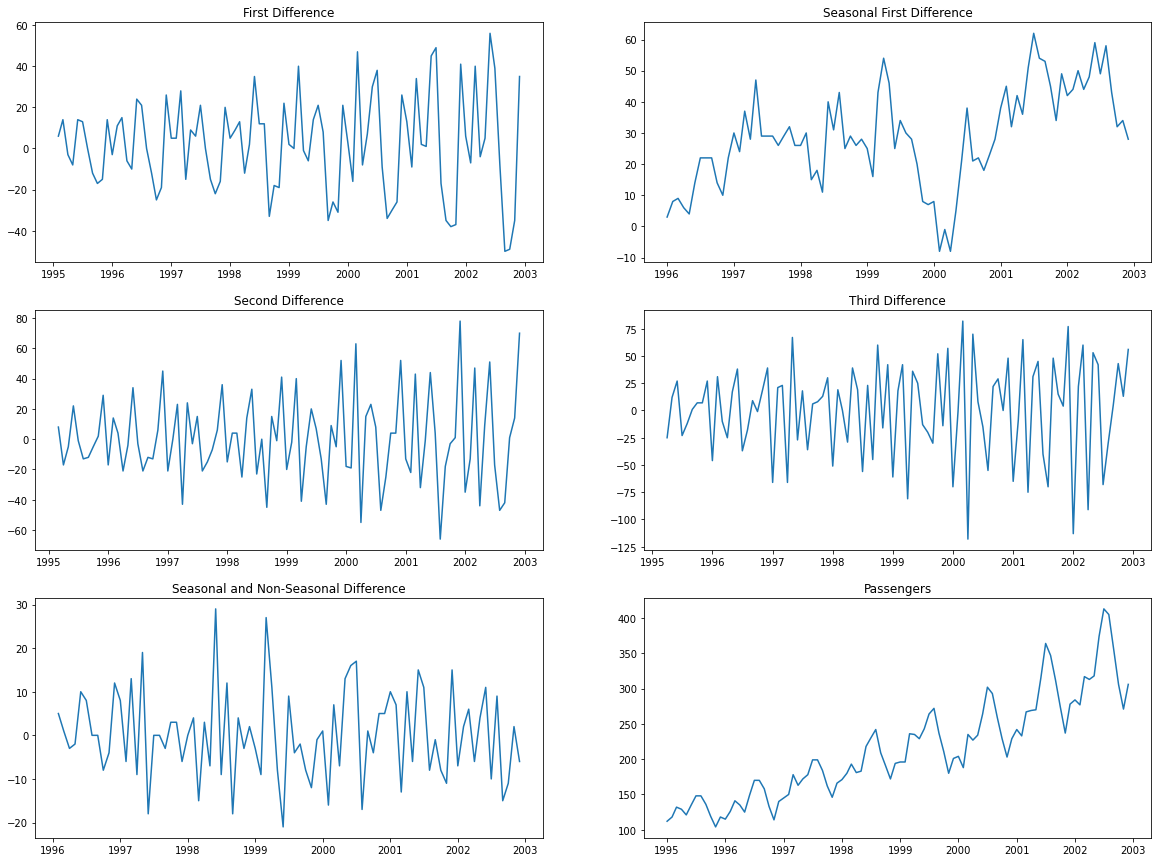

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20,15))

ax[0][0].plot(airline.first_diff)
ax[0][0].set_title('First Difference')

ax[0][1].plot(airline.seasonal_first_diff)
ax[0][1].set_title('Seasonal First Difference')

ax[1][0].plot(airline.second_diff)
ax[1][0].set_title('Second Difference')

ax[1][1].plot(airline.third_diff)
ax[1][1].set_title('Third Difference')

ax[2][0].plot(airline.seasonal_non_seasonal)
ax[2][0].set_title('Seasonal and Non-Seasonal Difference')

ax[2][1].plot(airline.Passengers)
ax[2][1].set_title('Passengers')

<div style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 20px; color:black">
    <b style="font-size: 25px;">✅ &nbsp; Observation:</b><br><br>- First Non-Seasonal Differencing plot show that, the dataset is stationary but still it consists of seasonality pattern even after trying second order Non-Seasonality differencing <br>
    - Third plot shows that, after first seasonality difference the dataset is not stationarised but after second order Seasonality difference, dataset is now stationary. <br>
    - So we can conclude that value of <b>Non-Seasonality difference may be 1 and/or For Seasonality difference may be equal to 2</b><br>
    - Using combination of seasonal and Non-Seasonal differencing the order of differencing may be equal to 1<br>
    - Let's Confirm this intuation using ADFuller test
</div> 

## <span><center style="text-indent: 2vw; color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.5'><b>2.5 | Finding correct order and type of differencing &nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>

In [17]:
def ADFuller(x):
    test = adfuller(x)
    print(f'{bl_}1. ADF : {y_}{test[0]}')
    print(f'{bl_}2. P-score : {y_}{test[1]}')
    print(f'{bl_}3. No. of lags used : {y_}{test[2]}')
    print(f'{bl_}4. number of observations used for the ADF regression : {y_}{test[3]}')
    print(f'{bl_}5. Critical values :')
    for key, item in test[4].items():
        print(f'\t{key} : {item}')

In [18]:
ADFuller(airline.Passengers)

1. ADF : 1.3402479596467032
2. P-score : 0.9968250481137263
3. No. of lags used : 12
4. number of observations used for the ADF regression : 83
5. Critical values :
	1% : -3.5117123057187376
	5% : -2.8970475206326833
	10% : -2.5857126912469153


In [19]:
ADFuller(airline.first_diff.dropna())

1. ADF : -2.150001735920652
2. P-score : 0.22488942647512628
3. No. of lags used : 12
4. number of observations used for the ADF regression : 82
5. Critical values :
	1% : -3.512738056978279
	5% : -2.8974898650628984
	10% : -2.585948732897085


In [20]:
ADFuller(airline.second_diff.dropna())

1. ADF : -11.547980944840823
2. P-score : 3.5031802363209806e-21
3. No. of lags used : 11
4. number of observations used for the ADF regression : 82
5. Critical values :
	1% : -3.512738056978279
	5% : -2.8974898650628984
	10% : -2.585948732897085


In [21]:
ADFuller(airline.third_diff.dropna() )

1. ADF : -8.68731978783411
2. P-score : 4.1296380722615856e-14
3. No. of lags used : 12
4. number of observations used for the ADF regression : 80
5. Critical values :
	1% : -3.5148692050781247
	5% : -2.8984085156250003
	10% : -2.58643890625


In [22]:
ADFuller(airline.seasonal_first_diff.dropna())

1. ADF : -2.6900043838623167
2. P-score : 0.07578397625851754
3. No. of lags used : 1
4. number of observations used for the ADF regression : 82
5. Critical values :
	1% : -3.512738056978279
	5% : -2.8974898650628984
	10% : -2.585948732897085


In [23]:
ADFuller(airline.seasonal_non_seasonal.dropna())

1. ADF : -11.69783994340899
2. P-score : 1.594893981767946e-21
3. No. of lags used : 0
4. number of observations used for the ADF regression : 82
5. Critical values :
	1% : -3.512738056978279
	5% : -2.8974898650628984
	10% : -2.585948732897085


<div style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 20px; color:black">
    <b style="font-size: 25px;">✅ &nbsp; Observation:</b><br><br>- So from ADFuller test we got the result that Non-Seasonal and Seasonal differencing should be 2 (overdifferenced) and 1 (underdifferenced) <br>
    - If we use combination of Non-Seasonal and Seasonal differencing the order must be 1 for both. <br>
    - But still it is not sure because Non-Seasonal difference may be over_differenced, So we use ACF and PACF plots to confirm the results
</div> 

## <span><center style="text-indent: 2vw; color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.6'><b>2.6 | ACF and PACF plots&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>

In [24]:
def ACF_and_PACF(x):
    plot_acf(x)
    plot_pacf(x)
    plt.show()

<span style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 25px; color:black"><b>📖 Non-Seasonal Differencing</b></span>

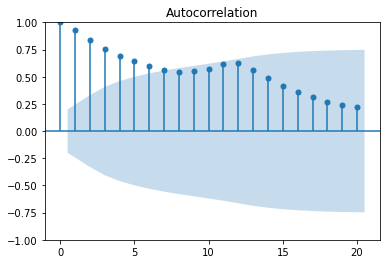

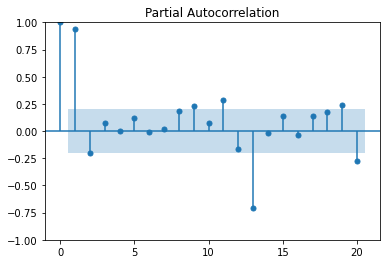

In [25]:
ACF_and_PACF(airline.Passengers)

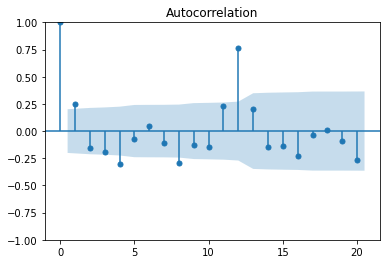

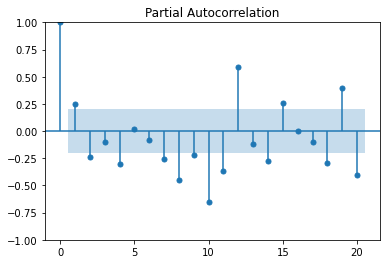

In [26]:
ACF_and_PACF(airline.first_diff.dropna())

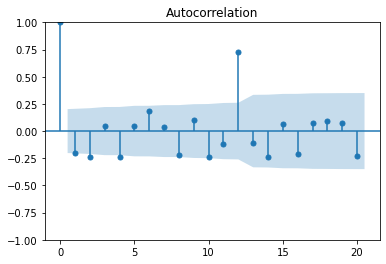

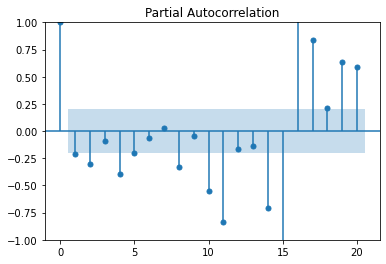

In [27]:
ACF_and_PACF(airline.second_diff.dropna())

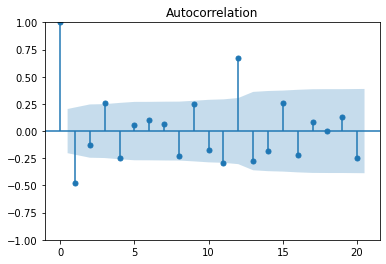

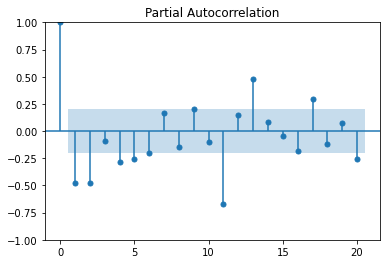

In [28]:
ACF_and_PACF(airline.third_diff.dropna())

<span style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 25px; color:black"><b>📖 Seasonal Differencing</b></span>

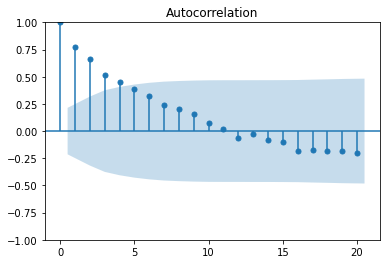

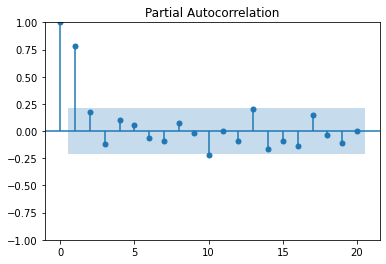

In [29]:
ACF_and_PACF(airline.seasonal_first_diff.dropna())

In [30]:
# ACF_and_PACF(airline.seasonal_second_diff.dropna())

<span style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 25px; color:black"><b>📖 Non-Seasonal + Seasonal Differencing</b></span>

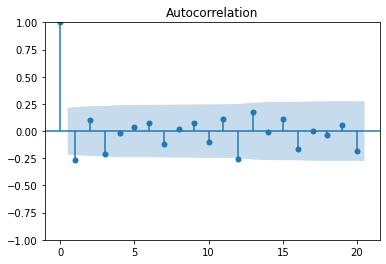

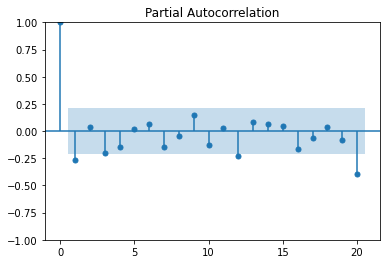

In [31]:
ACF_and_PACF(airline.seasonal_non_seasonal.dropna())

<div style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 20px; color:black">
    <b style="font-size: 25px;">✅ &nbsp; Observation:</b><br><br>- From ADFuller test we know that after 2 differencing the time series is stationary, but 1 differencing for seasonal + non-seasonal will work fine. <br>
    - If we ACF and PACF plot of single order non-seasonal differencing then we have to use AR and SAR term equal to 1. <br>
    - If Differencing is greater that 1, then MA and SAR term will be equal to 2 and 1.<br>
    - If single order of differencing is used for Non-Seasonal and Seasonal then from ACF and PACF plots, we can conclude that it is bit overdifferenced so we will use Moving Average terms MA and SMA equal to 1.
</div>

<div style="margin: 2em; line-height: 1.7em; font-family: Times New Roman; font-size: 20px; color:black">
    <b style="font-size: 25px;">✅ &nbsp; Observation:</b><br><br> So combinations to try <br>
    (0,1,1) x (0,1,1)<br>
    (0,2,1) x (1,0,0)<br>
    (0,0,1) x (0,2,1)<br>
</div>  

# <span><center style = "display: fill; border-radius: 40px; background-color:  #ecf0f1 ; font-family: Times New Roman; font-size:40px; color : black; letter-spacing: 3px; font-weight: bold; padding: 10px" id = "3" >3. &nbsp;MODEL BUILDING&nbsp;&nbsp;&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></center></span>

## <span><center style="text-indent: 2vw;color:black; display:fill; border-radius:30px; background-color: #ecf0f1 ; font-size:30px; font-family:Nexa; letter-spacing:0.5px; padding: 10px; text-align:left" id = '2.1'><b>2.1 | Basic Exploration&nbsp;&nbsp;<a href = '#toc' style = 'color : black'>&#10514;</a></b></center></span>